Author: Pierce Rotman

Professor: Pashaie

Course: CAP 6673

Date: 12 November 2023

Create a Hopfield neural network containing patterns of digits. Use this network to update noisy versions of these digits and record the accuracy of the network.

First we initialize the patterns.

In [5]:
import numpy as np
from PIL import Image
import random
import pandas as pd


#Initialize memories
zero = np.array([-1, 1, 1, 1, -1,
                 1, -1, -1, -1, 1,
                 1, -1, -1, -1, 1,
                 1, -1, -1, -1, 1,
                 1, -1, -1, -1, 1,
                 -1, 1, 1, 1, -1])
one = np.array([-1, 1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1,
                -1, -1, 1, -1, -1])
two = np.array([1, 1, 1, -1, -1,
                -1, -1, -1, 1, -1,
                -1, -1, -1, 1, -1,
                -1, 1, 1, -1, -1,
                1, 1, -1, -1, -1,
                -1, 1, 1, 1, 1])
three = np.array([-1, 1, 1, 1, -1,
                  -1, -1, -1, -1, 1,
                  -1, -1, 1, 1, 1,
                  -1, -1, -1, -1, 1,
                  -1, 1, 1, 1, -1,
                  -1, -1, -1, -1, -1])
four = np.array([1, -1, -1, 1, -1,
                 1, -1, -1, 1, -1,
                 1, -1, -1, 1, -1,
                 1, 1, 1, 1, 1,
                 -1, -1, -1, 1, -1,
                 -1, -1, -1, 1, -1])
five = np.array([1, 1, 1, 1, 1,
                 1, -1, -1, -1, -1,
                 1, 1, 1, 1, -1,
                 -1, -1, -1, 1, -1,
                 -1, -1, -1, 1, -1,
                 1, 1, 1, 1, -1])
six = np.array([1, -1, -1, -1, -1,
                1, -1, -1, -1, -1,
                1, 1, 1, 1, 1,
                1, -1, -1, -1, 1,
                1, -1, -1, -1, 1,
                1, 1, 1, 1, 1])
seven = np.array([1, 1, 1, 1, -1,
                  -1, -1, -1, 1, -1,
                  -1, -1, -1, 1, -1,
                  -1, -1, -1, 1, -1,
                  -1, -1, -1, 1, -1,
                  -1, -1, -1, 1, -1,])
eight = np.array([-1, -1, -1, -1, -1,
                  -1, 1, 1, 1, -1,
                  1, -1, -1, -1, 1,
                  1, 1, 1, 1, 1,
                  1, -1, -1, -1, 1,
                  -1, 1, 1, 1, -1])
nine = np.array([1, 1, 1, 1, 1,
                 1, -1, -1, -1, 1,
                 1, -1, -1, -1, 1,
                 1, 1, 1, 1, 1,
                 -1, -1, -1, -1, 1, 
                 -1, -1, -1, -1, 1])
pattern_list = [zero, one, two, three, four, 
               five, six, seven, eight, nine]
pattern_list = [pattern.flatten() for pattern in pattern_list]




Part a. and b. In this part, we write the functions for generating the Hopfield network containing only patterns 0 and 1, adding noise to patterns, and iterating through the network.

In [6]:
def build_weight(weight, patterns):
    """
    Builds a weights vector for a Hopfield Network
    Args:
        weight (numpy.ndarray): existing weights vector
        patterns (list): list of patterns in network
    Returns:
        none
    """
    for i in range(30):
        for j in range(30):
            weight[j,i] = sum([pattern[i]*pattern[j] for pattern in patterns])
    weight /= 30

def noise(vectors, num_errors):
    """
    Creates noisy vectors from neurons
    Args:
        neurons (list): list of neurons to alter
        num_errors (int): number of errors to introduce
    Returns:
        noisy_neurons (list): updated list of noisy vectors
    """
    noisy_vectors = []
    for vector in vectors:
        noisy = vector.copy()
        for i in range(num_errors):
            r1 = random.randint(0,29)
            noisy[r1] *= -1
        noisy_vectors.append(noisy)
    
    return noisy_vectors

def iterate(noisy_vectors, num_errors):
    """
    Iterates noisy vectors through a Hopfield network
    Args:
        noisy_vectors (list): list of noisy vectors
        num_errors (int): number of errors in vectors
    Returns:
        none
    """
    
    for k in range(len(noisy_vectors)):
        arr = noisy_vectors[k]
        previous = arr
        while(True):
            temp = []
            for i in range(30):
                val = 0
                for j in range(30):
                    val += W[i,j] * previous[j]
                val = np.sign(val)
                temp.append(val)
            arr = np.array(temp)
            if np.array_equal(arr, previous):
                break
            previous = arr
        noisy_vectors[k] = arr


#Part a and b.
W = np.zeros((30, 30))
build_weight(W, pattern_list[0:2])

for a in range(3):
    
    num_errors = 2*(a+1)
    for b in range(10):
        failures = {0:0, 1:0}
        
        #Generate noisy vectors from patterns
        noisy_vectors = noise(pattern_list[0:2], num_errors)
        
        #Update noisy patterns
        iterate(noisy_vectors, num_errors)
        for c in range(len(noisy_vectors)):
            if np.array_equal(noisy_vectors[0], pattern_list[0]) == False:
                failures[c] += 1
    print(f"Number of initial errors in each pattern: {num_errors}")
    print(f"\tPercent Failure: Zero: {failures[0]*10}%,"+
          f"\n\t\t\t One: {failures[1]*10}%")
        

Number of initial errors in each pattern: 2
	Percent Failure: Zero: 0%,
			 One: 0%
Number of initial errors in each pattern: 4
	Percent Failure: Zero: 0%,
			 One: 0%
Number of initial errors in each pattern: 6
	Percent Failure: Zero: 0%,
			 One: 0%


Regardless of whether there are 2, 4, or 6 initial errors, the Hopfield network containing only patterns 0 and 1 is able to accurately update the noisy patterns with 0% failure for both the 0 and 1 patterns.

Part c. Now, we do the same process as in part a. and b., but with a network containing patterns 0, 1, and 2.

In [7]:
#Part c
#Generate new weights matrix with 0, 1, andf 2 neurons
W = np.zeros((30,30))
build_weight(W, pattern_list[0:3])
for a in range(3):
    
    num_errors = 2*(a+1)
    for b in range(10):
        failures = {0:0, 1:0, 2:0}
        #Generate noisy vectors
        noisy_vectors = noise(pattern_list[0:3], num_errors)
        #Update noisy 
        iterate(noisy_vectors, num_errors)
        for c in range(len(noisy_vectors)):
            if np.array_equal(noisy_vectors[c], pattern_list[c]) == False:
                failures[c]+=1
    print(f"Number of initial errors in each pattern: {num_errors}")
    print(f"\tPercent Failure: Zero: {failures[0]*10}%,"+
         f"\n\t\t\t One: {failures[1]*10}%,"+
         f"\n\t\t\t Two: {failures[2]*10}%")

Number of initial errors in each pattern: 2
	Percent Failure: Zero: 0%,
			 One: 0%,
			 Two: 0%
Number of initial errors in each pattern: 4
	Percent Failure: Zero: 0%,
			 One: 0%,
			 Two: 0%
Number of initial errors in each pattern: 6
	Percent Failure: Zero: 0%,
			 One: 0%,
			 Two: 0%


Again, regardless of whether there are 2, 4, or 6 intial errors in the noisy patterns, the Hopfield network with patterns 0, 1, and 2 is able to correctly update the patterns with minimal (usually 0%) failure.

Now, we use a Hopfield network containing patters for digits 0-6. 

In [10]:
#Part d
W = np.zeros((30,30))
build_weight(W, pattern_list[0:7])
df = pd.DataFrame()
for a in range(3):
    num_errors = 2*(a+1)
    failures = [0, 0, 0, 0, 0, 0, 0]
    for b in range(10):
        #Generate noisy vectors
        noisy_vectors = noise(pattern_list[0:7], num_errors)
        #Update noisy vectors
        iterate(noisy_vectors, num_errors)
        for c in range(len(noisy_vectors)):
            if np.array_equal(noisy_vectors[c], pattern_list[c]) == False:
                failures[c]+=1
    df[str(num_errors)] = failures
    print(f"\tPercent Failure: Zero: {failures[0]*10}%,"+
         f"\n\t\t\t One: {failures[1]*10}%,"+
         f"\n\t\t\t Two: {failures[2]*10}%,"+
         f"\n\t\t\t One: {failures[3]*10}%,"+
         f"\n\t\t\t Two: {failures[4]*10}%,"+
         f"\n\t\t\t One: {failures[5]*10}%,"+
         f"\n\t\t\t Two: {failures[6]*10}%")
df *= 10

	Percent Failure: Zero: 10%,
			 One: 60%,
			 Two: 0%,
			 One: 20%,
			 Two: 0%,
			 One: 10%,
			 Two: 30%
	Percent Failure: Zero: 40%,
			 One: 40%,
			 Two: 10%,
			 One: 40%,
			 Two: 10%,
			 One: 30%,
			 Two: 30%
	Percent Failure: Zero: 40%,
			 One: 70%,
			 Two: 30%,
			 One: 60%,
			 Two: 20%,
			 One: 40%,
			 Two: 50%


Finally, we plot the percent error for each number of initial errors.

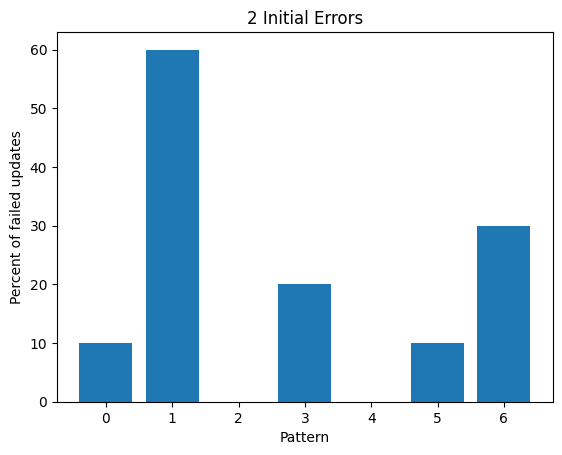

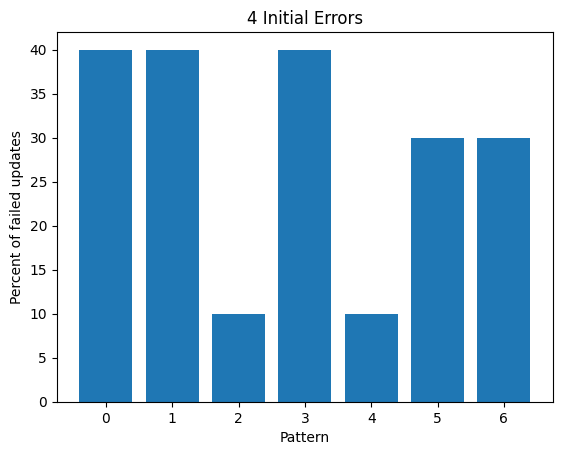

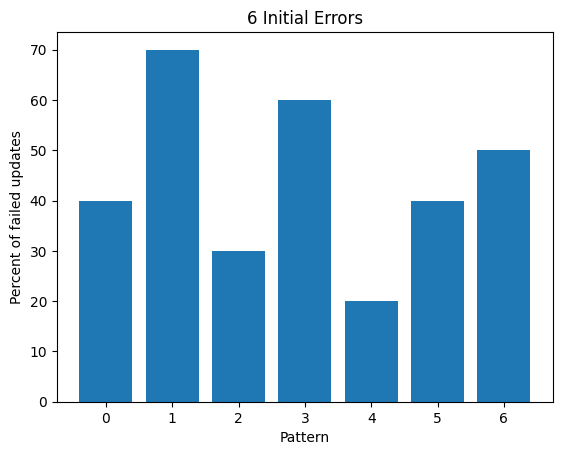

In [11]:
import matplotlib.pyplot as plt

plt.bar(range(7), df['2'].tolist(), tick_label=list(df['2'].keys()))
plt.title("2 Initial Errors")
plt.xlabel("Pattern")
plt.ylabel("Percent of failed updates")
plt.show()

plt.bar(range(7), df['4'].tolist(), tick_label=list(df['4'].keys()))
plt.title("4 Initial Errors")
plt.xlabel("Pattern")
plt.ylabel("Percent of failed updates")
plt.show()

plt.bar(range(7), df['6'].tolist(), tick_label=list(df['6'].keys()))
plt.title("6 Initial Errors")
plt.xlabel("Pattern")
plt.ylabel("Percent of failed updates")
plt.show()

Clearly, having a more complicated network (including more patterns) affects the accuracy of the updates. As expected, when we have a greater number of initial errors, we also have a higher percentage of failed updates to the noisy patterns. This reveals a limitation of our network - when we have too many patterns or too much noise, the network is not effective at identifying digits. If there are fewer patterns, or less noise with more patterns, the network is more effective.